# MKT Cycle ML Prediction

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

# Import ML Data Frame

In [57]:
# %run finmktml
# Read ML data Frame
filename='./data/dfmlXY_v202091_195013_to_2020824.csv'
dfMLXY = pd.read_csv(filename,index_col=0,parse_dates=True)
#dfsp500 = dfsp500[dataStartDate:]


# remove T10Y3M since it constrains dataset to 1982
#dfMLXY.drop('T10Y3M',axis=1, inplace=True)

display(dfMLXY.head(3))

print(dfMLXY.columns.values)
print(dfMLXY.dtypes)
display(dfMLXY.describe().T)
print(dfMLXY.shape)
dfMLXY.tail(3)

,Close_nma1,Volume_nma1,mkt,mucdown,mdcup,mcupm,T10Y3M,Close_nma50,Close_nma200,rma_sma50_sma200,...,UMCSENT,csentmom,Close_lrstd50,Close_lrstd126,mkt_50,Close,Volume,Close_sma50,Close_sma200,mcnr
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-03,NaN,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.66,1260000.0,NaN,NaN,0.000000
1950-01-04,0.011405,0.500000,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.85,1890000.0,NaN,NaN,0.011405
1950-01-05,0.004748,0.349206,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.93,2550000.0,NaN,NaN,0.016206


['Close_nma1' 'Volume_nma1' 'mkt' 'mucdown' 'mdcup' 'mcupm' 'T10Y3M'
 'Close_nma50' 'Close_nma200' 'rma_sma50_sma200' 'Close_nma5'
 'Close_nma10' 'Close_nma15' 'Close_nma20' 'Close_nma30' 'UNRATE'
 'CPIAUCSL' 'cpimom' 'NDI50' 'PDI50' 'ADX' 'gdp_qoq' 'gdp_prevqoq'
 'UMCSENT' 'csentmom' 'Close_lrstd50' 'Close_lrstd126' 'mkt_50' 'Close'
 'Volume' 'Close_sma50' 'Close_sma200' 'mcnr']
Close_nma1          float64
Volume_nma1         float64
mkt                 float64
mucdown             float64
mdcup               float64
mcupm               float64
T10Y3M              float64
Close_nma50         float64
Close_nma200        float64
rma_sma50_sma200    float64
Close_nma5          float64
Close_nma10         float64
Close_nma15         float64
Close_nma20         float64
Close_nma30         float64
UNRATE              float64
CPIAUCSL            float64
cpimom              float64
NDI50               float64
PDI50               float64
ADX                 float64
gdp_qoq             float64
g

,count,mean,std,min,25%,50%,75%,max
Close_nma1,17711.0,3.500248e-04,9.891147e-03,-0.204669,-4.036688e-03,4.796287e-04,5.000097e-03,1.158004e-01
Volume_nma1,17711.0,2.032172e-02,2.919657e-01,-0.960321,-9.268494e-02,0.000000e+00,1.055545e-01,2.651968e+01
mkt,17712.0,6.806685e-01,7.326123e-01,-1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
mucdown,17712.0,3.506272e-02,4.078395e-02,0.000000,2.262789e-03,2.019593e-02,5.373295e-02,3.323633e-01
mdcup,17712.0,8.566015e-03,3.212325e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.290963e-01
mcupm,17712.0,9.021003e-01,2.971874e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
T10Y3M,9680.0,1.758394e+00,1.124853e+00,-0.960000,8.500000e-01,1.840000e+00,2.660000e+00,5.180000e+00
Close_nma50,17662.0,3.460891e-04,1.303673e-03,-0.009075,-3.140674e-04,4.481853e-04,1.168261e-03,6.999761e-03
Close_nma200,17512.0,3.413499e-04,6.579870e-04,-0.003243,-2.417557e-05,4.044019e-04,7.788304e-04,2.611790e-03
rma_sma50_sma200,17513.0,2.257036e-02,5.807209e-02,-0.252154,-9.861394e-03,2.929754e-02,5.876443e-02,1.554482e-01


(17712, 33)


,Close_nma1,Volume_nma1,mkt,mucdown,mdcup,mcupm,T10Y3M,Close_nma50,Close_nma200,rma_sma50_sma200,...,UMCSENT,csentmom,Close_lrstd50,Close_lrstd126,mkt_50,Close,Volume,Close_sma50,Close_sma200,mcnr
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-20,0.003159,-0.062204,1.0,0.00126,0.0,1.0,0.54,0.001271,0.000747,0.045987,...,89.1,-11.9,0.012957,0.029188,1.0,3385.510010,3.642850e+09,3213.140020,3071.872997,0.513145
2020-08-21,0.003441,0.017176,1.0,0.00000,0.0,1.0,0.54,0.002519,0.000770,0.048009,...,89.1,-11.9,0.009382,0.029027,1.0,3397.159912,3.705420e+09,3221.041216,3073.485696,0.518352
2020-08-24,0.010044,0.006280,1.0,0.00000,0.0,1.0,0.53,0.002458,0.000817,0.049941,...,89.1,-11.9,0.009323,0.028904,1.0,3431.280029,3.728690e+09,3228.840615,3075.258196,0.533602


### Nulls

In [58]:
%run fmml

display(dfMLXY.shape)
# before this date the date Yield Curve is not available
# dataStartDate=dt.datetime(1954,1,1)
dataStartDate=dt.datetime(1982,1,1) # with T10Y3M
# Consumer sentiment available from 1953 -2 1

dfMLXY=dfMLXY.loc[dataStartDate:]
display(dfMLXY.shape)
print(dfMLXY.shape)
# Null Rows
nullrows=sum([True for idx,row in dfMLXY.iterrows() if any(row.isnull())])
nrows=len(dfMLXY)
print("nrows = ",nrows,"null_rows = ",nullrows)

# UMCSENT starts in 1955
# GDP starts 1950
# Yield Curve Starts in 1982
# UNRATE starts in 1950
# CPI start in 1950
display(dfMLXY.head(3))
dfMLXY.tail(3)

(17712, 33)

(9680, 33)

(9680, 33)
nrows =  9680 null_rows =  0


,Close_nma1,Volume_nma1,mkt,mucdown,mdcup,mcupm,T10Y3M,Close_nma50,Close_nma200,rma_sma50_sma200,...,UMCSENT,csentmom,Close_lrstd50,Close_lrstd126,mkt_50,Close,Volume,Close_sma50,Close_sma200,mcnr
Date,,,,,,,,,,,,,,,,,,,,,
1982-01-04,0.001550,-0.098578,-1.0,0.126530,0.0,1.0,2.32,0.000467,-0.000384,-0.034377,...,71.0,6.7,0.008031,0.008893,-1.0,122.739998,36760000.0,122.8138,127.18610,-0.126530
1982-01-05,-0.021916,0.292437,-1.0,0.145673,0.0,1.0,2.24,0.000105,-0.000517,-0.033780,...,71.0,6.7,0.008626,0.009080,-1.0,120.050003,47510000.0,122.8220,127.11595,-0.145673
1982-01-06,-0.007247,0.084193,-1.0,0.151865,0.0,1.0,2.43,0.000134,-0.000613,-0.033061,...,71.0,6.7,0.008598,0.009099,-1.0,119.180000,51510000.0,122.8336,127.03340,-0.151865


,Close_nma1,Volume_nma1,mkt,mucdown,mdcup,mcupm,T10Y3M,Close_nma50,Close_nma200,rma_sma50_sma200,...,UMCSENT,csentmom,Close_lrstd50,Close_lrstd126,mkt_50,Close,Volume,Close_sma50,Close_sma200,mcnr
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-20,0.003159,-0.062204,1.0,0.00126,0.0,1.0,0.54,0.001271,0.000747,0.045987,...,89.1,-11.9,0.012957,0.029188,1.0,3385.510010,3.642850e+09,3213.140020,3071.872997,0.513145
2020-08-21,0.003441,0.017176,1.0,0.00000,0.0,1.0,0.54,0.002519,0.000770,0.048009,...,89.1,-11.9,0.009382,0.029027,1.0,3397.159912,3.705420e+09,3221.041216,3073.485696,0.518352
2020-08-24,0.010044,0.006280,1.0,0.00000,0.0,1.0,0.53,0.002458,0.000817,0.049941,...,89.1,-11.9,0.009323,0.028904,1.0,3431.280029,3.728690e+09,3228.840615,3075.258196,0.533602


# Create X and Y dataframes

In [59]:
# Y dataframes
dfY=pd.DataFrame(dfMLXY['mkt'])
dfY.rename(columns={'mkt':'y'},inplace=True)
dfY['y']=(dfY['y']+1)/2
display(dfY.head(3))

# note mkt is contained by X and Y dataframes
# it is okay to put market into X
# mkt will be shifted in the training so that 'mkt' is for days preceeding the truth variable
print(dfY.shape)

,y
Date,
1982-01-04,0.0
1982-01-05,0.0
1982-01-06,0.0


(9680, 1)


### X , Feature Scaling

In [62]:
# Feature Scaling
#   scaling is applied to columns, whereas normalization is applied to rows
#   scaling is important for some algorithms
#  MinMax Scaling - robust to small standard deviations
#      these variables are fairly well constrained
#                          to small std deviations 
#      mdcuup, mucdown
#      close_price_nma1
#      close_price_nma50, close_price_nma200,  rma_sma50_sma200
#      csentmom
#  Mean/Variance Scaling - most common form of scalig, good for well
#     behaved distribtions. Normal, not long tailed, or heavily skewed
#     Take out the mean and divide by std deviation
#     Use this for all variables except the aforementioned two
#    
# note mkt is contained by X and Y dataframes
# it is okay to put market into X
# mkt will be shifted in the training so that 'mkt' is for days preceeding the truth variable 'mkt'


minmax_cols=[ 'mcupm' , 'mdcup', 'mucdown', 'Close_nma1', 'Close_nma5', 'Close_nma10','Close_nma15','Close_nma20',
              'Close_nma30','Close_nma50', 'Close_nma200',  
              'rma_sma50_sma200','csentmom',]

meanvar_cols=['Volume_nma1' ,'gdp_qoq','gdp_prevqoq' , 
              'UNRATE' , 'CPIAUCSL' , 'cpimom' ,'NDI50' , 'PDI50',
               'ADX' , 'UMCSENT', 'Close_lrstd50', 'Close_lrstd126','T10Y3M']

#  .... these seem to make the performance worse for now, try after PCA

from sklearn.preprocessing import StandardScaler
SScaler=StandardScaler()
X1=SScaler.fit_transform(dfMLXY[meanvar_cols])

from sklearn.preprocessing import MinMaxScaler
MMScaler=MinMaxScaler()
X2=MMScaler.fit_transform(dfMLXY[minmax_cols])
cols=minmax_cols+meanvar_cols
X = np.column_stack((X1, X2))
dfX=pd.DataFrame(data=X, columns=cols, index=dfMLXY.index)
print(dfX.shape)
dfX.tail(3)

(9680, 26)


,mcupm,mdcup,mucdown,Close_nma1,Close_nma5,Close_nma10,Close_nma15,Close_nma20,Close_nma30,Close_nma50,...,UNRATE,CPIAUCSL,cpimom,NDI50,PDI50,ADX,UMCSENT,Close_lrstd50,Close_lrstd126,T10Y3M
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-20,-0.244073,-8.260172,-2.765713,2.218554,1.682227,1.417139,-1.483463,-0.138084,0.023474,0.09306,...,0.648510,0.627448,0.654299,0.642128,0.688976,0.695912,0.643609,0.681418,0.745183,0.026667
2020-08-21,-0.017067,-8.260172,-2.765713,2.218554,1.682227,1.417139,-1.531362,-0.099247,0.059600,0.09306,...,0.649392,0.635100,0.659378,0.634941,0.706233,0.684731,0.721230,0.685369,0.750237,0.026667
2020-08-24,-0.048227,-8.260172,-2.765713,2.218554,1.682227,1.417139,-1.611432,0.151098,0.039598,0.09306,...,0.669995,0.650633,0.672586,0.639806,0.710978,0.715618,0.717476,0.693347,0.755066,0.026667


In [63]:
print(cols)

['mcupm', 'mdcup', 'mucdown', 'Close_nma1', 'Close_nma5', 'Close_nma10', 'Close_nma15', 'Close_nma20', 'Close_nma30', 'Close_nma50', 'Close_nma200', 'rma_sma50_sma200', 'csentmom', 'Volume_nma1', 'gdp_qoq', 'gdp_prevqoq', 'UNRATE', 'CPIAUCSL', 'cpimom', 'NDI50', 'PDI50', 'ADX', 'UMCSENT', 'Close_lrstd50', 'Close_lrstd126', 'T10Y3M']


# Feature Alignment

In [64]:
# Feature and Label Alignment

Ndays=[1,3,5,7,15,25,63,100]
NdayFeatures = [['mcupm','Close_nma1','mucdown','mdcup','cpimom','csentmom','T10Y3M'],
                ['Close_nma5'],['Close_nma10'],['Close_nma15'],['Close_nma30'],
                ['Close_nma50','NDI50','PDI50','ADX','Close_lrstd50'], 
                ['Close_lrstd126'], ['Close_nma200']]



# these caused decrease in performance .... Close_lrstd50, Close_lrstd126
#  1st round remove bottom three feature importances mdcup, T10Y3M, UNRATE
#  2nd round PDI50, nma20, nma30 gdpqoq cpiucsl
dfXaligned=pd.DataFrame(data=dfX[dfX.columns[0]],index=dfX.index)
dfYaligned=pd.DataFrame(data=dfY[dfY.columns[0]],index=dfY.index)


for nday,ndayfeatures in zip(Ndays,NdayFeatures):
    for ndayfeature in ndayfeatures:
        featurename=ndayfeature+'_nd'+str(nday)
        dfXaligned[featurename]=dfX[ndayfeature].shift(nday-1)    
ndaymax=max(Ndays)

print('dfX.columns[0]=',dfX.columns[0])
dfXaligned.drop(dfX.columns[0],axis=1,inplace=True)

print('ndaymax =',ndaymax)
dfXaligned=dfXaligned.loc[dfXaligned.index[ndaymax]:]
dfYaligned=dfYaligned.loc[dfYaligned.index[ndaymax]:]

target_variable='y'
new_target_variable = target_variable+'_1'
dfYaligned[new_target_variable] = dfY[target_variable].shift(-1)
dfYaligned.drop(target_variable,axis=1,inplace=True)

display(dfXaligned.tail(3))
display(dfYaligned.tail(3))

# RF performance ... from 1985-1-2 to 2020-8-24  .. decision includ Close_lrst50
 #sdwith Close_lrst50 
  # accuracy = 0.9906961103015357
  # precision (tp /(tp + fp))= 0.9649484536082474
  # recall tp /(tp + fn) = 0.950253807106599
  # fscore = 2*precision*recall / (precision + recall) =  0.9575447570332482
  # tp = 936 fp = 34 tn = 7902 fn = 49
# without Close_lrstd50 ...from 1985-1-2 to 2020-8-24
   #accuracy = 0.9895751597354556
   #precision (tp /(tp + fp))= 0.951417004048583
   #recall tp /(tp + fn) = 0.9543147208121827
   #fscore = 2*precision*recall / (precision + recall) =  0.952863659401926
   #tp = 940 fp = 48 tn = 7888 fn = 45
    
 # with Close_lrstd50 ..from 1955-1-2 to 2020-8-24    
   # accuracy = 0.9899155579855415
   # precision (tp /(tp + fp))= 0.9753659407354516
   # recall tp /(tp + fn) = 0.9657122658183104
   # fscore = 2*precision*recall / (precision + recall) =  0.9705150976909415
   # tp = 2732 fp = 69 tn = 13563 fn = 97
    
# with T10Y3M .... from from 1985-1-2 to 2020-8-24 
   # accuracy = 0.9922654410940478
   # precision (tp /(tp + fp))= 0.9692622950819673
   # recall tp /(tp + fn) = 0.9604060913705583
   # fscore = 2*precision*recall / (precision + recall) =  0.9648138704742478
   # tp = 946 fp = 30 tn = 7906 fn = 39

dfX.columns[0]= mcupm
ndaymax = 100


,mcupm_nd1,Close_nma1_nd1,mucdown_nd1,mdcup_nd1,cpimom_nd1,csentmom_nd1,T10Y3M_nd1,Close_nma5_nd3,Close_nma10_nd5,Close_nma15_nd7,Close_nma30_nd15,Close_nma50_nd25,NDI50_nd25,PDI50_nd25,ADX_nd25,Close_lrstd50_nd25,Close_lrstd126_nd63,Close_nma200_nd100
Date,,,,,,,,,,,,,,,,,,
2020-08-20,-0.244073,2.218554,-2.765713,-8.260172,0.654299,-1.083214,0.026667,1.682227,1.417139,-1.514480,-0.953780,0.09306,0.647976,0.671579,0.643817,0.679208,0.406734,5.193030
2020-08-21,-0.017067,2.218554,-2.765713,-8.260172,0.659378,-1.083214,0.026667,1.682227,1.417139,-1.563425,-0.951470,0.09306,0.703428,0.696763,0.615479,0.701678,0.411208,5.260919
2020-08-24,-0.048227,2.218554,-2.765713,-8.260172,0.672586,-1.092105,0.026667,1.682227,1.417139,-1.576646,-0.900645,0.09306,0.681327,0.688134,0.598987,0.696304,0.421591,5.293796


,y_1
Date,
2020-08-20,1.0
2020-08-21,1.0
2020-08-24,NaN


# PCA Feature Reduction

In [591]:
print(dfXaligned.columns)
print('No. Variables =',len(dfXaligned.columns))

Index(['mcupm_nd1', 'Close_nma1_nd1', 'mucdown_nd1', 'mdcup_nd1', 'cpimom_nd1',
       'csentmom_nd1', 'Close_nma5_nd3', 'Close_nma10_nd5', 'Close_nma15_nd7',
       'Close_nma30_nd15', 'Close_nma50_nd25', 'NDI50_nd25', 'PDI50_nd25',
       'ADX_nd25', 'Close_lrstd126_nd50', 'Close_nma200_nd100'],
      dtype='object')
No. Variables = 16


n components 9


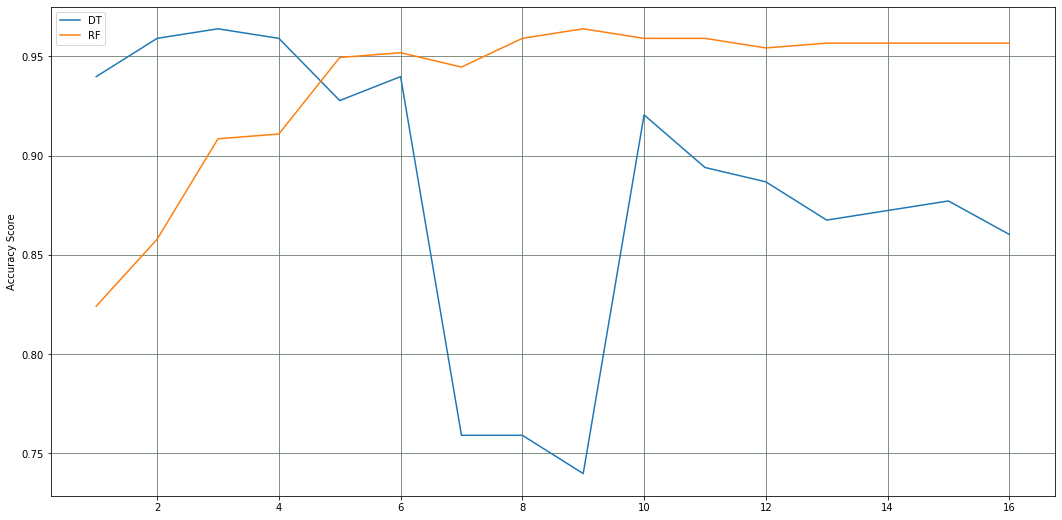

In [472]:

from sklearn.decomposition import PCA
Npca=9
pca_model = PCA(n_components=Npca)
XPCA = pca_model.fit_transform(dfXaligned)

dfXPCA=pd.DataFrame(data=XPCA,index=dfXaligned.index)

print('n components',pca_model.n_components_)

## PCA training results summary
# Model = DT, Model Train Days = 5
# predict start/end  2019-1-2 /2020-8-24 ... accuracy score = 0.9507389162561576
# PCA Accuracy Scores

scores_dt=[0.9397590361445783, 0.9590361445783132, 0.963855421686747, 0.9590361445783132,
        0.927710843373494, 0.9397590361445783, 0.7590361445783133, 0.7590361445783133, 
        0.7397590361445783, 0.9204819277108434, 0.8939759036144578, 0.8867469879518072,
        0.8674698795180723, 0.8722891566265061, 0.8771084337349397, 0.8602409638554217]


scores_rf=[0.8240963855421687,0.8578313253012049, 0.908433734939759,0.9108433734939759,
           0.9493975903614458, 0.9518072289156626, 0.944578313253012, 0.9590361445783132,
           0.963855421686747, 0.9590361445783132, 0.9590361445783132, 0.9542168674698795,
           0.9566265060240964, 0.9566265060240964, 0.9566265060240964, 0.9566265060240964]

x=list(range(1,len(scores_dt)+1))
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[18,9])
ax.plot(x,scores_dt,label='DT')
ax.plot(x,scores_rf,label='RF')
ax.set_ylabel("Accuracy Score")
ax.legend(loc='upper left')


plt.grid(b=True, which='major', color='#667667', linestyle='-')
plt.show()


# RF performance with Percent of Variance
# https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained
nc = [9, 8]
p = [0.95,0.9]
score_p = [0.963855421686747, 0.9590361445783132]

# RF performance 9 PCA components, 2000-1-2 to 2020-8-24, model days = 5
# 0.90 accuracy ... the model does not perform so well. Better to go w/o PCA for RF model
# accuracy =  0.948, Precision =0.938, Recall =0.763, tp tp = 679 fp = 45 tn = 4033 fn = 211
# not so good!
# stick with non PCA

# Model Training

In [7]:
# Training and Prediction
#   Features          dfX = dfMLXY.loc[train_s:test_e]
#   Labels            dfY = dfT.loc[train_s:train_e]
#   Train/Predict     mClfTrainTest() classifier training and prediction."fit" classifier from test_s date to test_e
#                      dsMake one prediction per date, looking ahead by ndays and save in order to compare later to labels.
#                      dftr DataFrame
#   Volatility & MA   Compute volatility and moving averages heuristic model.
#   Save              save DataFrame "dftr" training results from t := train_s:train_e
#   Confusion Matrix  Compute and print confusion matrix
#   Plot              Training summary vs. nday

%run fmml

# dates
#predict_s = dt.datetime(2020,8,11)      # 2016 for daily predictions, 2000, 1970, 1960
#predict_e = dt.datetime(2020,8,24)

#predict_s = dt.datetime(2019,1,2) 
#predict_e = dt.datetime(2020,8,24)

#predict_s = dt.datetime(2000,1,3)
#predict_e = dt.datetime(2020,8,24)

predict_s = dt.datetime(1985,1,2) 
predict_e = dt.datetime(2020,8,24)

#predict_s = dt.datetime(1955,1,3) 
#predict_e = dt.datetime(2020,8,24)

# Model Training and Prediction

# join X and Y into one 
#dfXY = dfX.join(dfY)
# Nday and NdayFeatures


# Machine Learning
model='RF' #
print("...")
trainall=True
trainsamples=10000
k_model_days=5

PCAflag=False
if PCAflag == True:
    dfTrain=dfXPCA
else:
    dfTrain=dfXaligned  
    
dfXYTR,dfTR,clf = fmclftraintest(dfTrain,dfYaligned,'y_1',predict_s,predict_e,k=k_model_days,model=model,
                          trainsamples=trainsamples,trainall=trainall,smooth=3,v=1)

display(dfTR[['p_1','y_1','model_date']].tail(10))


...
train after every k = 5 days
predict start date = 1985-01-02
predict end date =  2020-08-24
train samples requested = 10000
train samples available = 659

1986-01-02 train samples requested = 909 train samples available = 909
  samples = 909 pos samples = 54 neg samples = 855
  pos samplesize = 54 neg samplesize = 855
  accuracy =  1.000
  precision (tp /(tp + fp)) = nan
  recall tp /(tp + fn) = nan
  fscore = 2*precision*recall / (precision + recall) = nan
  tp = 0 fp = 0 tn = 253 fn = 0
1987-01-02 train samples requested = 1164 train samples available = 1164
  samples = 1164 pos samples = 54 neg samples = 1110
  pos samplesize = 54 neg samplesize = 1110
  accuracy =  1.000
  precision (tp /(tp + fp)) = nan
  recall tp /(tp + fn) = nan
  fscore = 2*precision*recall / (precision + recall) = nan
  tp = 0 fp = 0 tn = 506 fn = 0
1988-01-04 train samples requested = 1414 train samples available = 1414
  samples = 1414 pos samples = 125 neg samples = 1289
  pos samplesize = 125 neg samp

2009-01-02 train samples requested = 6709 train samples available = 6709
  samples = 6709 pos samples = 973 neg samples = 5736
  pos samplesize = 973 neg samplesize = 5736
  accuracy =  0.991
  precision (tp /(tp + fp)) = 0.972
  recall tp /(tp + fn) = 0.968
  fscore = 2*precision*recall / (precision + recall) = 0.970
  tp = 890 fp = 26 tn = 5110 fn = 29
2010-01-04 train samples requested = 6964 train samples available = 6964
  samples = 6964 pos samples = 1015 neg samples = 5949
  pos samplesize = 1015 neg samplesize = 5949
  accuracy =  0.990
  precision (tp /(tp + fp)) = 0.971
  recall tp /(tp + fn) = 0.966
  fscore = 2*precision*recall / (precision + recall) = 0.968
  tp = 928 fp = 28 tn = 5318 fn = 33
2011-01-03 train samples requested = 7214 train samples available = 7214
  samples = 7214 pos samples = 1015 neg samples = 6199
  pos samplesize = 1015 neg samplesize = 6199
  accuracy =  0.991
  precision (tp /(tp + fp)) = 0.971
  recall tp /(tp + fn) = 0.966
  fscore = 2*precision*

,p_1,y_1,model_date
Date,,,
2020-08-11,1.0,1.0,2020-08-07
2020-08-12,1.0,1.0,2020-08-07
2020-08-13,1.0,1.0,2020-08-07
2020-08-14,1.0,1.0,2020-08-07
2020-08-17,1.0,1.0,2020-08-14
2020-08-18,1.0,1.0,2020-08-14
2020-08-19,1.0,1.0,2020-08-14
2020-08-20,1.0,1.0,2020-08-14
2020-08-21,1.0,1.0,2020-08-14


In [8]:
# Join the training results with some of the original data
# needed for analyzing and visualizing
dfxyp=dfMLXY[['Close','Volume',
              'Close_sma50','Close_sma200',
              'mcnr','mcupm','mdcup','mucdown','mkt']].join(dfXYTR[['p','y_1','p_1','model_date']],lsuffix='l',rsuffix='r', how='outer' )

display(dfxyp.tail(5))

,Close,Volume,Close_sma50,Close_sma200,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date
Date,,,,,,,,,,,,,
2020-08-18,3389.780029,3.881310e+09,3205.879214,3068.797096,0.515053,1.0,0.0,0.000000,1.0,1.0,1.0,1.0,2020-08-14
2020-08-19,3374.850098,3.884480e+09,3209.232617,3070.336797,0.508380,1.0,0.0,0.004404,1.0,1.0,1.0,1.0,2020-08-14
2020-08-20,3385.510010,3.642850e+09,3213.140020,3071.872997,0.513145,1.0,0.0,0.001260,1.0,1.0,1.0,1.0,2020-08-14
2020-08-21,3397.159912,3.705420e+09,3221.041216,3073.485696,0.518352,1.0,0.0,0.000000,1.0,1.0,1.0,1.0,2020-08-14
2020-08-24,3431.280029,3.728690e+09,3228.840615,3075.258196,0.533602,1.0,0.0,0.000000,1.0,1.0,NaN,1.0,2020-08-21


In [9]:
# save model

save=True
if save==True:
    savedir='./data'
    s=predict_s
    e=predict_e
    if PCAflag == True:
        filename='dfxyp'+'_'+model+'_'+str(k_model_days)+'days'+'_pca'+str(Npca)+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
    else:
        filename='dfxyp'+'_'+model+'_'+str(k_model_days)+'days'+'_'+str(s.year)+'-'+str(s.month)+'-'+str(s.day)
    filename=savedir+'/'+filename+'_to_'+str(e.year)+'-'+str(e.month)+'-'+str(e.day)+'.csv'
    print('save file:',filename)
    dfxyp.reset_index().to_csv(filename,index=False)

save file: ./data/dfxyp_RF_5days_1985-1-2_to_2020-8-24.csv


In [4]:
# read dfxyp
filename='./data/dfxyp_RF_5d_1955-1-3_to_2020-8-24.csv'
read=False
if read==True:
    dfxyp = pd.read_csv(filename,index_col=0,parse_dates=True)

In [10]:
## Smooth The prediction

    #####################################################################
    ###  Smooth with previous predictions, majority vote              ###
    ###  amount of smoothing is controlled with the input parameter   ###
    ###  ks, and placed in the "p_s" variable. See input argument     ###
    ######################################################################
smooth=4
dfxyp['p_s']=dfxyp['p_1']*2  - 1  # convert variable to be +/- 1
for ks in range(1,smooth+1):
    dfxyp['p_s']=dfxyp['p_s']+dfxyp['p_s'].shift(ks)
dfxyp.loc[dfxyp.p_s > 0 , 'p_s']= 1   # convert back to 0 and 1
dfxyp.loc[dfxyp.p_s < 0 , 'p_s']= 0

dfxyp.tail(5)   

,Close,Volume,Close_sma50,Close_sma200,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date,p_s
Date,,,,,,,,,,,,,,
2020-08-18,3389.780029,3.881310e+09,3205.879214,3068.797096,0.515053,1.0,0.0,0.000000,1.0,1.0,1.0,1.0,2020-08-14,1.0
2020-08-19,3374.850098,3.884480e+09,3209.232617,3070.336797,0.508380,1.0,0.0,0.004404,1.0,1.0,1.0,1.0,2020-08-14,1.0
2020-08-20,3385.510010,3.642850e+09,3213.140020,3071.872997,0.513145,1.0,0.0,0.001260,1.0,1.0,1.0,1.0,2020-08-14,1.0
2020-08-21,3397.159912,3.705420e+09,3221.041216,3073.485696,0.518352,1.0,0.0,0.000000,1.0,1.0,1.0,1.0,2020-08-14,1.0
2020-08-24,3431.280029,3.728690e+09,3228.840615,3075.258196,0.533602,1.0,0.0,0.000000,1.0,1.0,NaN,1.0,2020-08-21,1.0


## Confusion Matrix

In [11]:
# Confusion Matrix "p"
%run fmml
(accuracy,precision,recall,fscore,dfcma,dfcmr,tp,fp,tn,fn)=fmclfperformance(dfxyp,'y_1','p_1')


,Predicted Positive,Predicted Negative,Totals
actual Positive,946,39,1038
actual Negative,30,7906,8541


posvalue = 0 negvalue = 1
accuracy = 0.9922654410940478
precision (tp /(tp + fp))= 0.9692622950819673
recall tp /(tp + fn) = 0.9604060913705583
fscore = 2*precision*recall / (precision + recall) =  0.9648138704742478
tp = 946 fp = 30 tn = 7906 fn = 39


## Feature Importance and Explainability

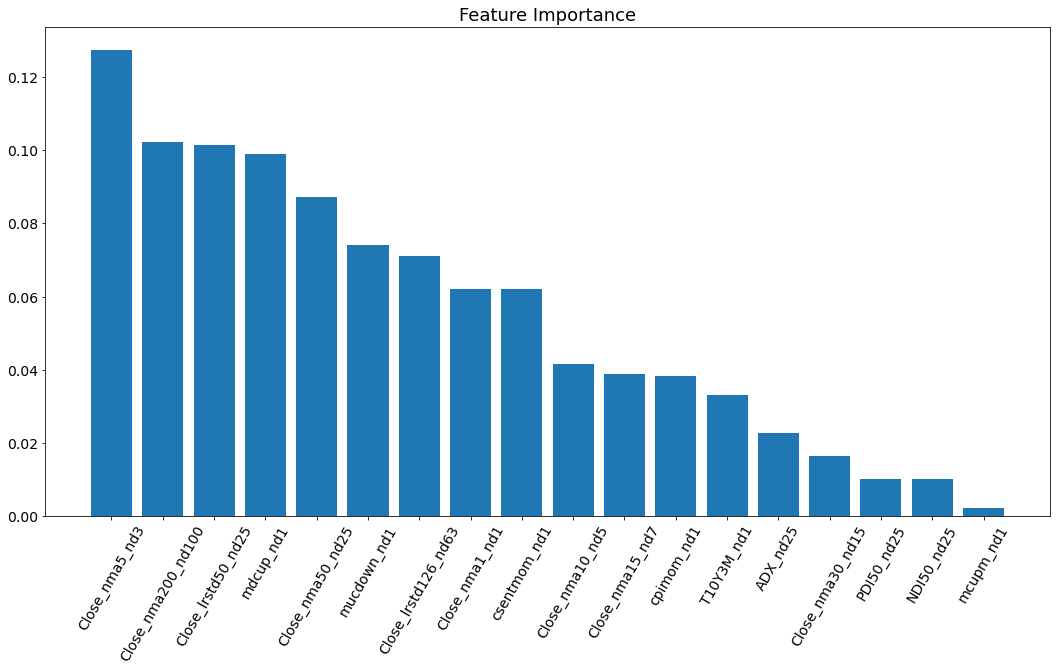

In [12]:
# Feature Importance 
# https://chrisalbon.com/machine_learning/trees_and_forests/feature_importance/
importances=clf.feature_importances_
# sort importances in descending order
indices = list(np.argsort(importances)[::-1])
# rearange feature names so they match the sorted features
feature_names=dfTrain.columns
names = [ feature_names[i] for i in indices]

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[18,9])
ax.bar(names, importances[indices])
plt.xticks(rotation=60,fontsize=14)
plt.yticks(fontsize=14)
ax.set_title("Feature Importance",fontsize=18)
# Show plot
plt.show()

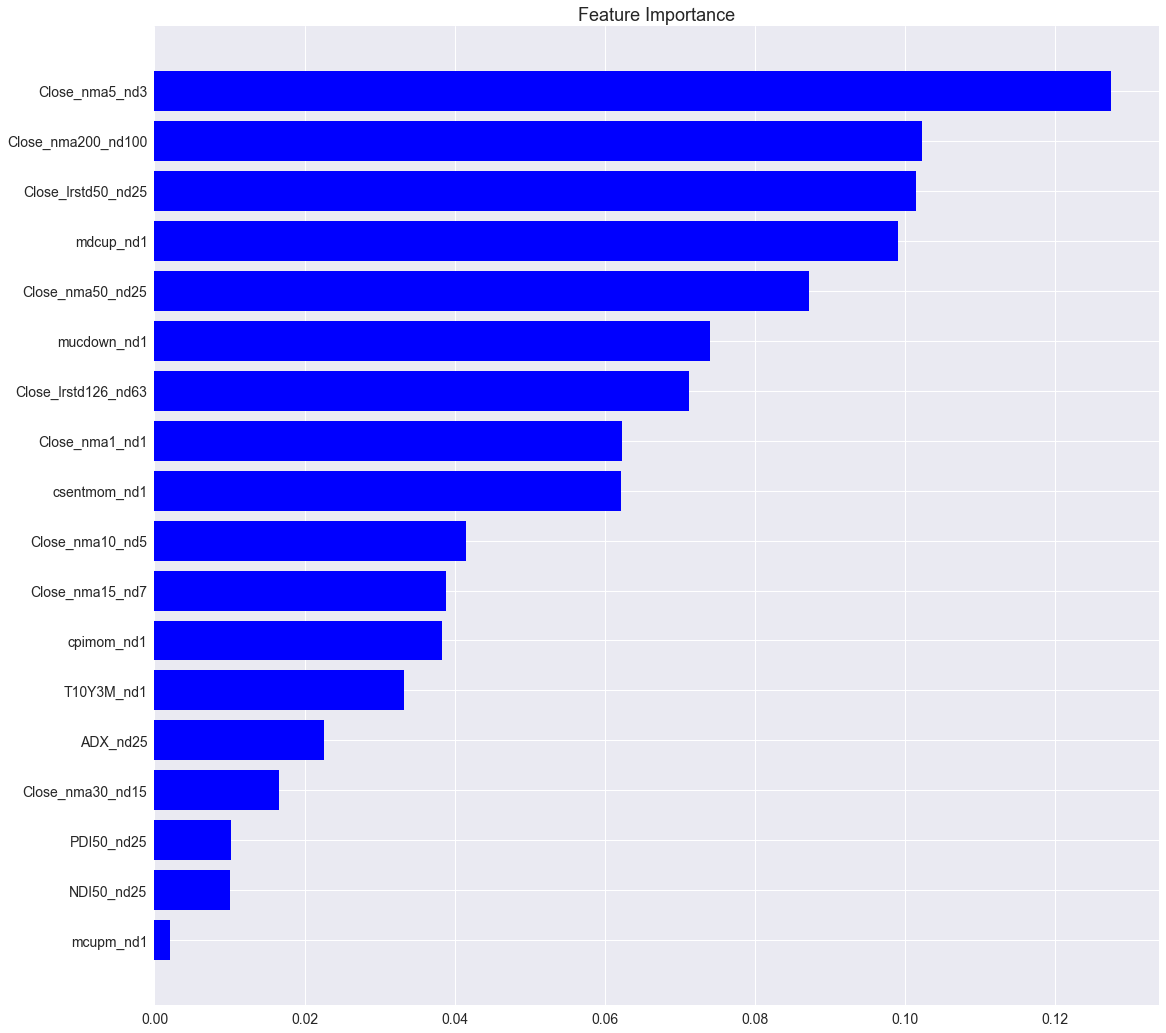

In [27]:
# horizontal bars
importances=clf.feature_importances_
# sort importances in descending order
indices = list(np.argsort(importances))
# rearange feature names so they match the sorted features
feature_names=dfTrain.columns
names = [ feature_names[i] for i in indices]
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[18,18])
ax.barh(names, importances[indices], color = 'blue', align ='center')
plt.xticks(rotation=0,fontsize=14)
plt.yticks(fontsize=14)
ax.set_title("Feature Importance",fontsize=18)
# Show plot
plt.show()

In [669]:
# Decision Tree 

from sklearn import tree
from sklearn.tree import export_text
fig = plt.figure(figsize=(25,20))

feature_names=list(dfXaligned.columns)
#_ = tree.plot_tree(clf, feature_names=feature_names, class_names=['up','down'],filled=True)
#fig.savefig("DecisionTree.png")
t=tree.export_text(clf,feature_names=feature_names)
print(t)

#with open("decistion_tree.log", "w") as fout:
#    fout.write(t)

|--- csentmom_nd1 <= 0.50
|   |--- Close_nma200_nd100 <= 1.22
|   |   |--- cpimom_nd1 <= 0.61
|   |   |   |--- Close_nma200_nd100 <= -0.31
|   |   |   |   |--- class: 1.0
|   |   |   |--- Close_nma200_nd100 >  -0.31
|   |   |   |   |--- NDI50_nd25 <= 0.40
|   |   |   |   |   |--- Close_nma50_nd25 <= -0.23
|   |   |   |   |   |   |--- Close_nma15_nd7 <= 0.75
|   |   |   |   |   |   |   |--- Close_nma10_nd5 <= -4.80
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Close_nma10_nd5 >  -4.80
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Close_nma15_nd7 >  0.75
|   |   |   |   |   |   |   |--- mcupm_nd1 <= -0.72
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- mcupm_nd1 >  -0.72
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Close_nma50_nd25 >  -0.23
|   |   |   |   |   |   |--- cpimom_nd1 <= 0.41
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- cpi

<Figure size 1800x1440 with 0 Axes>

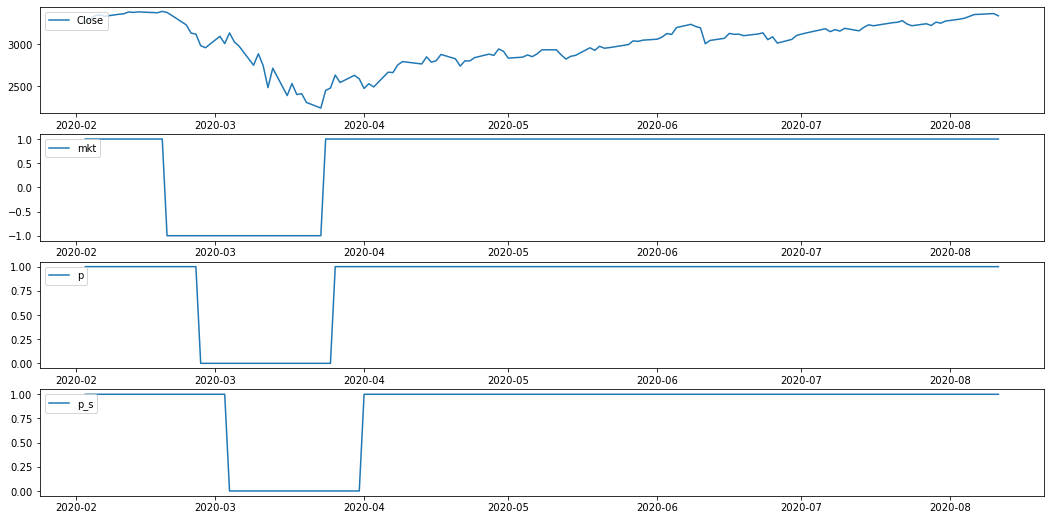

In [15]:
%run fmplot

startdate=dt.datetime(2020,2,1)
enddate=dt.datetime(2020,8,11)


#fmplot(dfxyp,variables, startdate=startdate, enddate=enddate)

variables=['Close','mkt','p','p_s']
fig,ax = plt.subplots(nrows=len(variables),ncols=1,figsize=[18,9])

for k,name in zip(range(0,len(variables)),variables):
    ax[k].plot(dfxyp.loc[startdate:enddate,name],label=name)
    #ax[k].set_xlabel("date")
    ax[k].set_ylabel("")
    ax[k].legend(loc='upper left')

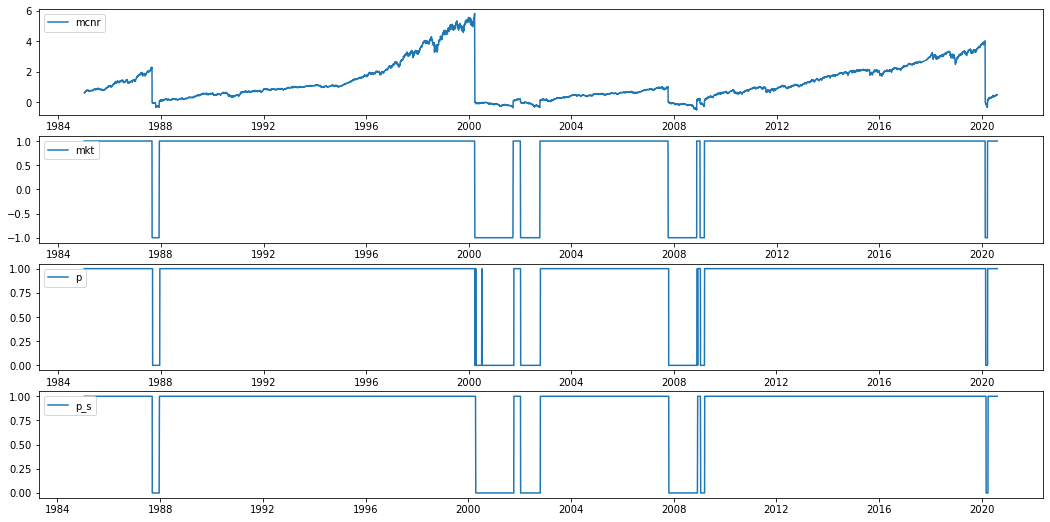

In [16]:




startdate=dt.datetime(2008,10,1)
enddate=dt.datetime(2009,2,1)

startdate=dt.datetime(1985,1,1)
enddate=dt.datetime(2020,8,11)

#startdate=dt.datetime(2019,1,1)
#enddate=dt.datetime(2020,8,11)

#startdate=dt.datetime(2000,1,1)
#enddate=dt.datetime(2001,12,31)



name=['mcnr','Close','mkt','p','p_s']
name=['mcnr','mkt','p','p_s']
fig,ax = plt.subplots(nrows=len(name),ncols=1,figsize=[18,9])
k=list(range(0,len(name)))
for k,name in zip(k,name):
    ax[k].plot(dfxyp.loc[startdate:enddate,name],label=name)
    #ax[k].set_xlabel("date")
    ax[k].set_ylabel("")
    ax[k].legend(loc='upper left')



###### Backtest

In [17]:
# backtest
%run fmml

startdate=dt.datetime(1955,1,1)
startdate=dt.datetime(1985,1,1)
enddate=dt.datetime(2020,8,24)
price_variable='Close'
predictor='p_s'

# Backtest
(dftsummary,dfreturns,dfbt)=fmbacktest(dfxyp[startdate:enddate].copy(),price_variable,predictor)

In [18]:
dftsummary

,start_date,end_date,start_price,end_price,start_strategyvalue,end_strategyvalue,r,r_strategy
1985,1985-01-02,1985-12-31,165.369995,211.279999,165.369995,211.279999,0.277620,0.277620
1986,1986-01-02,1986-12-31,209.589996,242.169998,209.589996,242.169998,0.155446,0.155446
1987,1987-01-02,1987-12-31,246.449997,247.080002,246.449997,314.482586,0.002556,0.276050
1988,1988-01-04,1989-01-03,255.940002,275.309998,325.759563,350.413628,0.075682,0.075682
1989,1989-01-03,1990-01-02,275.309998,359.690002,350.413628,457.812210,0.306491,0.306491
1990,1990-01-02,1990-12-31,359.690002,330.220001,457.812210,420.302893,-0.081932,-0.081932
1991,1991-01-02,1991-12-31,326.450012,417.089996,415.504464,530.870727,0.277653,0.277653
1992,1992-01-02,1992-12-31,417.260010,435.709991,531.087120,554.570193,0.044217,0.044217
1993,1993-01-04,1993-12-31,435.380005,466.450012,554.150188,593.695988,0.071363,0.071363
1994,1994-01-03,1995-01-03,465.440002,459.109985,592.410450,584.353626,-0.013600,-0.013600


In [19]:
dfbt.head(3)

,Close,Volume,Close_sma50,Close_sma200,mcnr,mcupm,mdcup,mucdown,mkt,p,y_1,p_1,model_date,p_s,Close_R,Close_strategyvalue
Date,,,,,,,,,,,,,,,,
1985-01-02,165.369995,67820000.0,165.5528,160.41680,0.614626,1.0,0.0,0.042166,1.0,NaN,1.0,1.0,1984-12-31,NaN,0.000000,165.369995
1985-01-03,164.570007,88880000.0,165.4970,160.44535,0.606815,1.0,0.0,0.046800,1.0,1.0,1.0,1.0,1984-12-31,NaN,-0.004838,164.570007
1985-01-04,163.679993,77480000.0,165.4288,160.47045,0.598125,1.0,0.0,0.051955,1.0,1.0,1.0,1.0,1984-12-31,NaN,-0.005408,163.679993


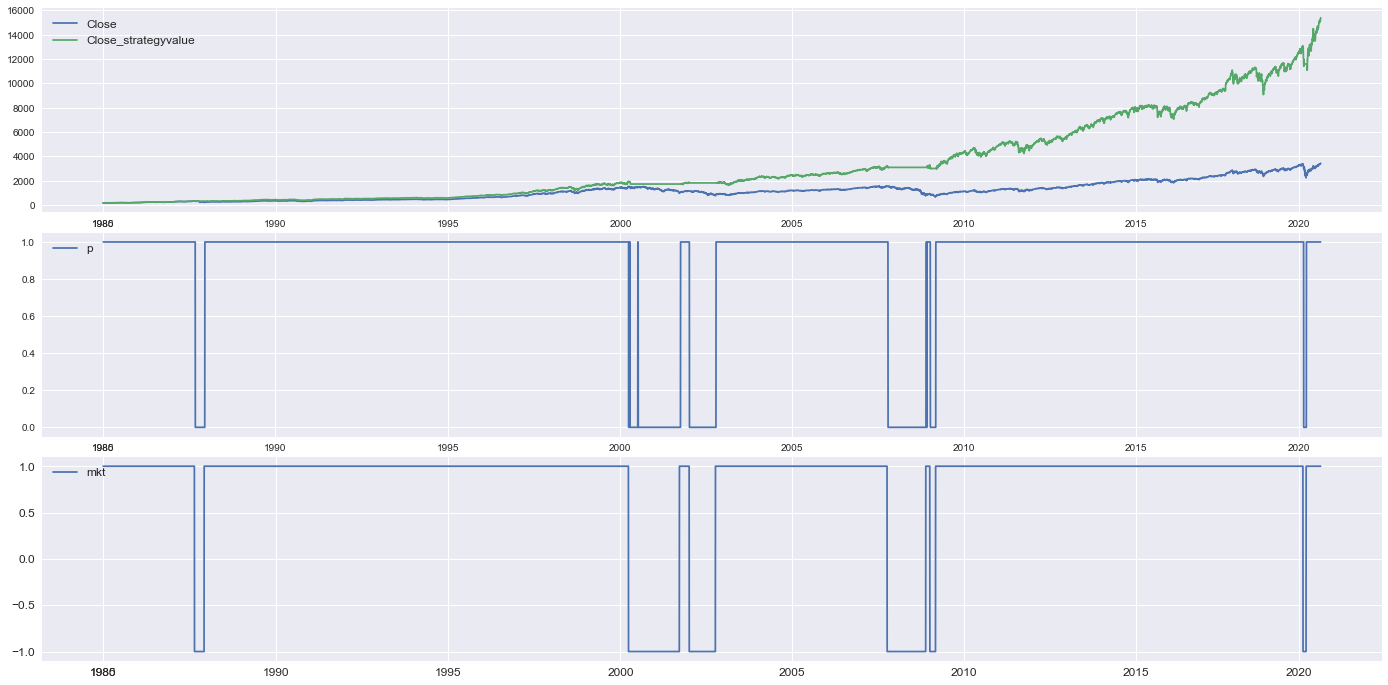

In [49]:
%run fmplot
s=dt.datetime(1980,1,1)
e=dt.datetime(2020,12,31)
dfbt['mkt2']=(dfbt['mkt']+1)/2
fmplot(dfbt,variables=[['Close','Close_strategyvalue'],'p','mkt'],startdate=s,enddate=e)

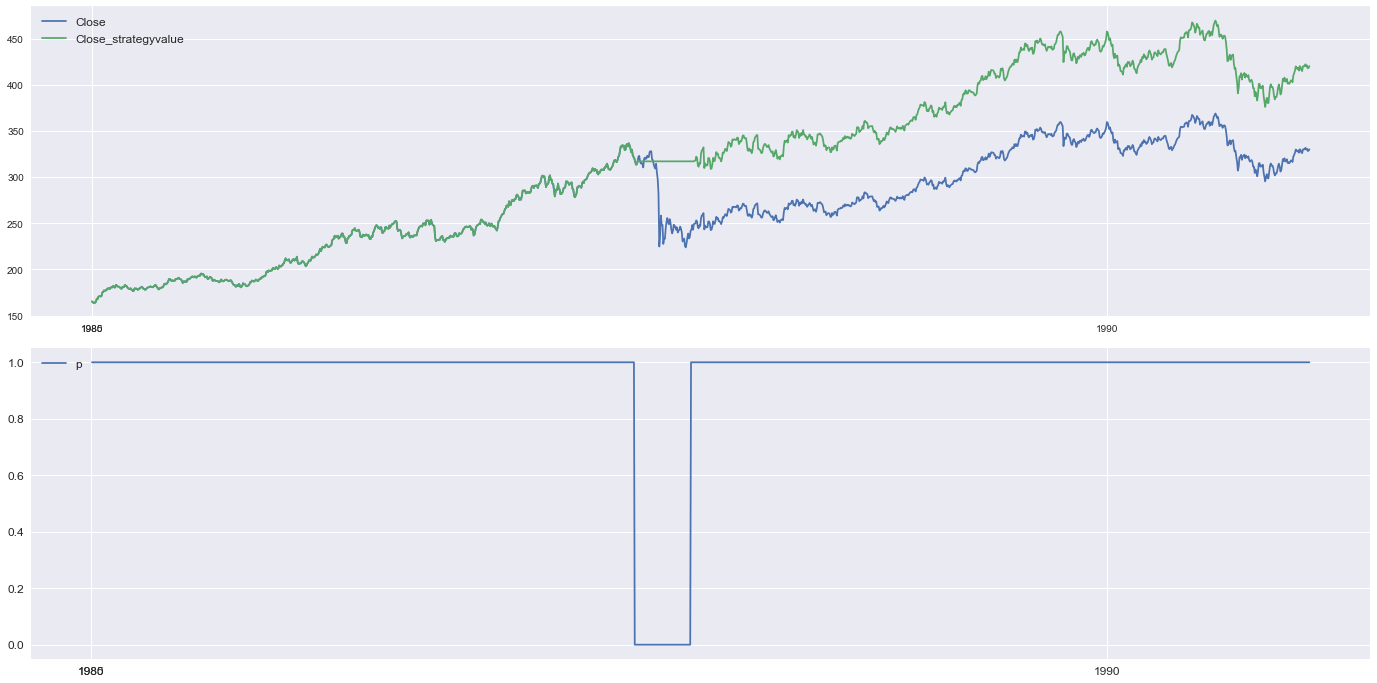

In [50]:
%run fmplot
s=dt.datetime(1980,1,1)
e=dt.datetime(1990,12,31)
fmplot(dfbt,variables=[['Close','Close_strategyvalue'],'p'],startdate=s,enddate=e)

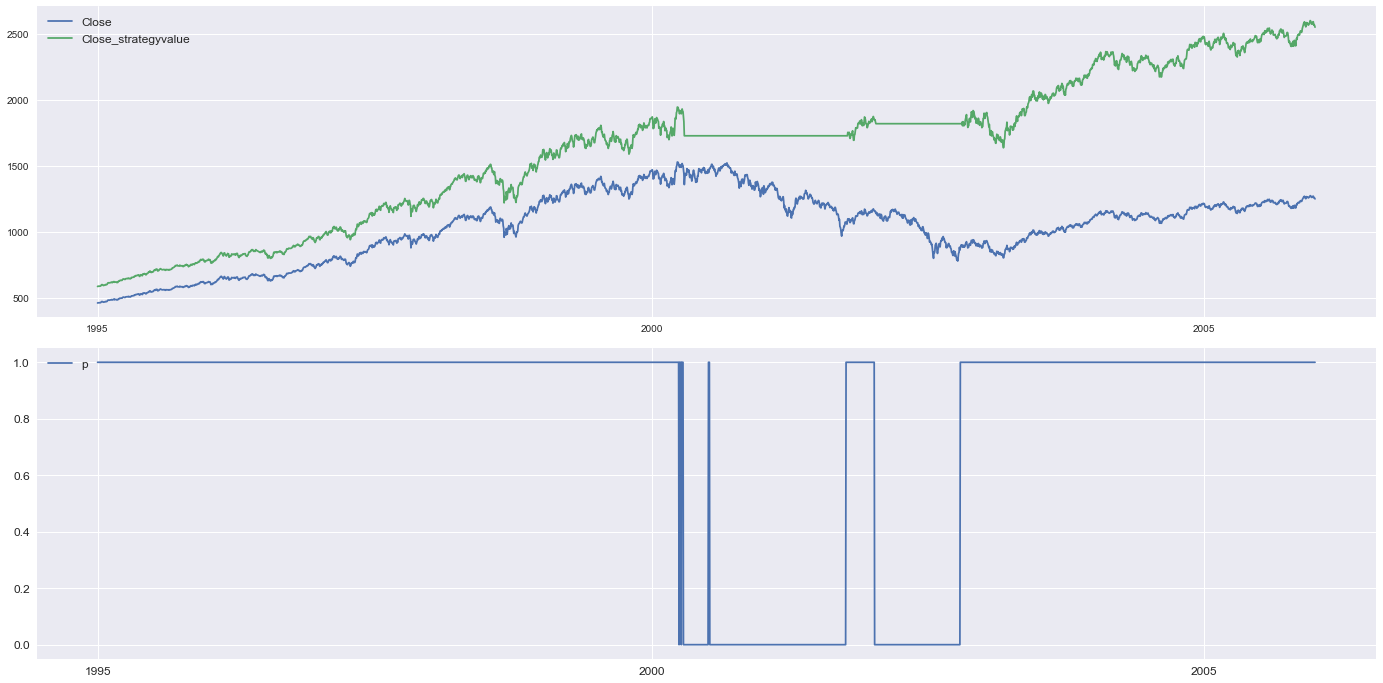

In [55]:
%run fmplot
s=dt.datetime(1995,1,1)
e=dt.datetime(2005,12,31)
fmplot(dfbt,variables=[['Close','Close_strategyvalue'],'p'],startdate=s,enddate=e)

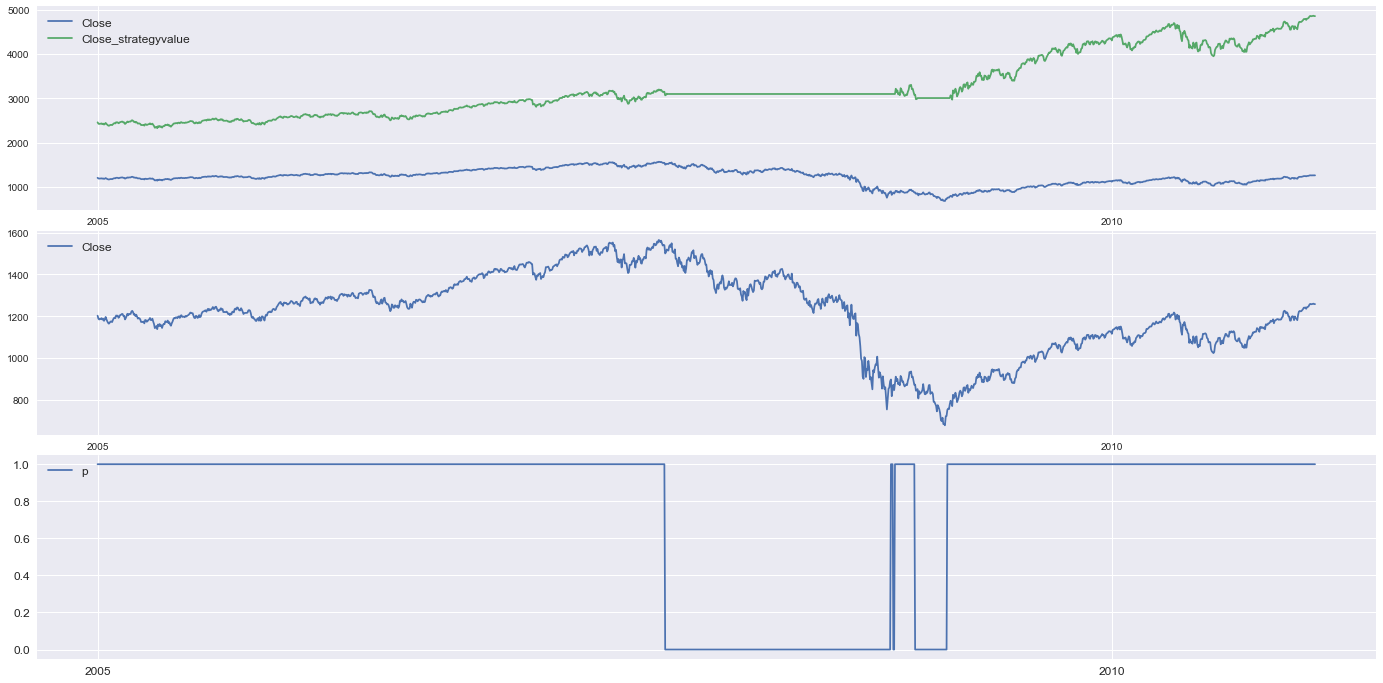

In [54]:
%run fmplot
s=dt.datetime(2005,1,1)
e=dt.datetime(2010,12,31)
fmplot(dfbt,variables=[['Close','Close_strategyvalue'],'Close','p'],startdate=s,enddate=e)

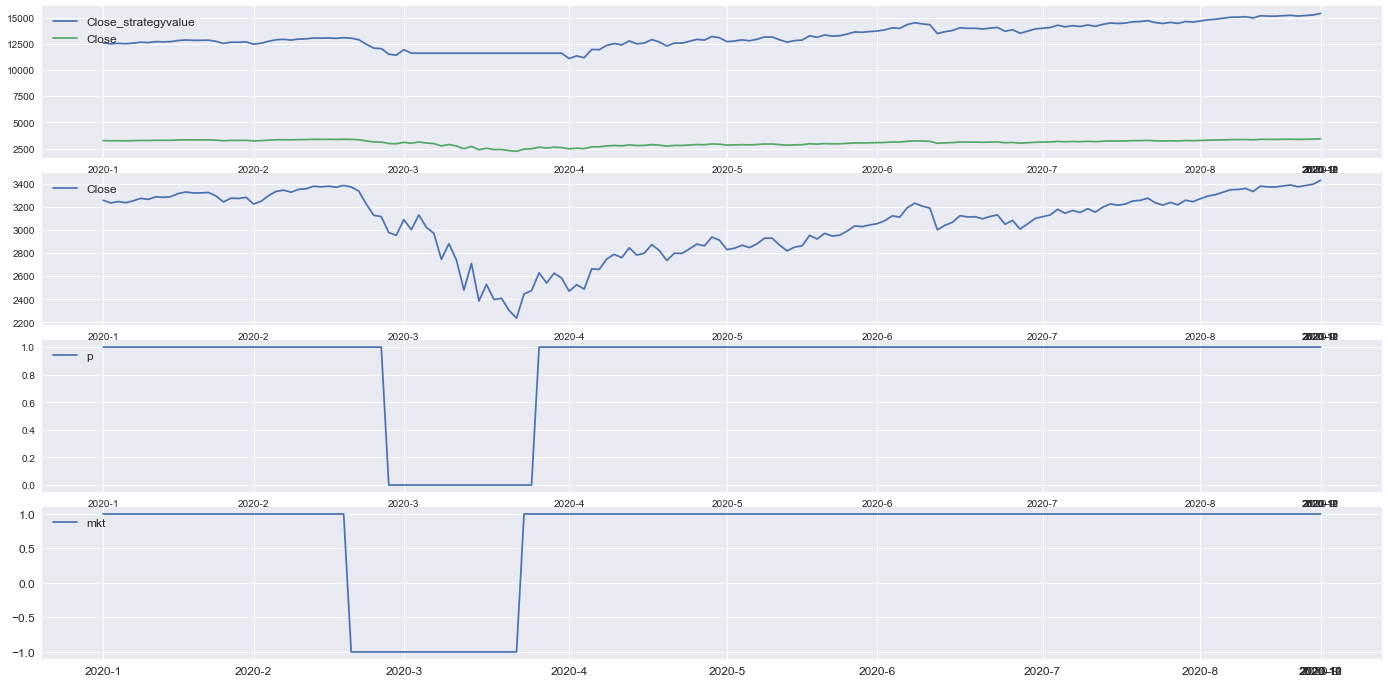

In [53]:
%run fmplot
s=dt.datetime(2020,1,1)
e=dt.datetime(2020,12,31)
fmplot(dfbt,variables=[['Close_strategyvalue', 'Close'],'Close','p','mkt'],startdate=s,enddate=e)